PREDICTION OF SIZE OF SILVER NPs

INTRODUCTION

Nanotechnology can be described as the field in science and technology involved in the engineering, production, and utilization of nanomaterials. To nanomaterials can be accounted any material of natural, incidental or engineered origin, which possess at least one or more external dimensions in the range from 1 to 100 nm [1]. However, the objects that fit the designated limits in each dimension (x, y, z) are considered as NPs.

The NPs made from coinage metals attract attention due to their unique optical properties coming from the specific behavior under light irradiation, namely the appearance of Localized Surface Plasmon Resonance (LSPR) [1]; while the resonance wavelength depends on particle size and shape [2]. In addition, silver particles having fine or ultrafine sizes have attracted scientific interest because of their unusual properties compared to bulk metal, such as excellent electrical conductivity, catalytical activity, chemical stability and antimicrobial activity. Due to the above, Ag-NPs are used in medicine, medicinal devices, pharmacology, biotechnology, electronics, engineering, energy, magnetic fields, and also in environmental remediation [2],[3]. Then, it is easy to establish that in the past few years, nanoparticle production by a size-controlled procedure has become a new and interesting research focus. 

Ag NPs can be synthesized through physical, chemical, and biological methods. Chemical reduction of colloidal silver is perhaps the most popular approach to produce this nanomaterial. This method involves the usage of organic and inorganic reducing agents in the presence of a stabilizer that prevent nanoparticle aggregation [4]. It has been found that the particle size and morphology can be modified due to changing the concentration of the silver precursor (oxidant agent), reducing agent and stabilizer. In addition, through the controll of the reaction's temperature and pH, the silver nanoparticle can be given a definite size [2],[3].

It is with all those experimental parameters that a Machine Learning model can be developed to predict the size of Ag NPs before they are synthetized. This model will allow researchers to have some certainty about the results they expect to achieve in order to minimize economic and time efforts.

DATASET

An own-made short dataset was developed for the present informal study as there is no existence and/or current access to any official dataset of Ag NPs synthesis. Expermimental Ag NPs data is of NPs synthetized by the chemical reduction method described above, all under continious stirring. The NPs' size, which were calculated from DLS, TEM or SEM analisys, was the target property for which we aimed to construct predictive models. The features in the dataset can be categorized into the following (we excluded the columns 'reference' and 'stirring', as they are not being used in the models).-

- Molar concentration of the Ag ions precursor (oxidant agent) in mol dm-3.
- Molar concentration of the reductant agent in mol dm-3.
- Molar concentration of surfactant (or stabilizer) in mol dm-3.
- Approximate pH of the reaction.
- Final stage temperature of the reaction.
- Temperature which the NPs were storaged.
- Time from the Ag precursor ions solution was added to the reductant agent solution to the change of coloration     was showed.

As a summary, the data used in this work has 33 instances/rows, 8 features/columns (concentrations and synthesis parameters), and 1 target property (Ag nanoparticles' size). To see the articles from which the data was extracted follow this link: 

Helpful libraries and jupyter-notebooks.-

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
%run AgNPs_functions.ipynb

1. LOAD AND CHECK DATA

In [2]:
df = pd.read_excel('AgNPs_dataset.xlsx')
df.head()

,OX,OX_S,RE,RE_S,S,SS,pH,T,CT,t,St,Size,Reference
0,0.00100,2.0,0.002,48.0,0.00428,1,10.5,90,4,20,1,5.0,https://pubs.rsc.org/en/content/articlepdf/201...
1,0.00100,2.0,0.002,48.0,0.00355,1,10.5,90,4,20,1,7.0,https://pubs.rsc.org/en/content/articlepdf/201...
2,0.00117,2.0,0.002,48.0,0.00200,1,10.5,90,4,20,1,10.0,https://pubs.rsc.org/en/content/articlepdf/201...
3,0.00100,2.0,0.001,48.0,0.00106,1,10.5,90,4,20,1,15.0,https://pubs.rsc.org/en/content/articlepdf/201...
4,0.00100,2.0,0.001,48.0,0.00355,1,10.5,90,4,20,1,20.0,https://pubs.rsc.org/en/content/articlepdf/201...


In [3]:
df.shape

(54, 13)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
OX,54.0,0.012837,0.031174,0.000256,0.001000,0.001282,0.002308,0.1000
OX_S,54.0,101.001481,95.231652,0.080000,2.000000,180.000000,195.000000,195.0000
RE,54.0,0.036976,0.104931,0.000005,0.000600,0.002000,0.050000,0.7618
RE_S,54.0,24.984259,30.912841,0.250000,5.000000,8.000000,43.750000,100.0000
S,54.0,0.073086,0.306564,0.000256,0.001282,0.002329,0.003405,2.1980
SS,54.0,0.648148,0.677326,0.000000,0.000000,1.000000,1.000000,2.0000
pH,54.0,8.981296,2.216078,3.320000,9.000000,10.000000,10.000000,11.0000
T,54.0,38.092593,37.767545,7.000000,8.000000,20.000000,90.000000,100.0000
CT,54.0,9.574074,9.000214,4.000000,4.000000,4.000000,8.000000,30.0000
t,54.0,70.666667,271.978565,3.000000,3.000000,15.000000,20.000000,1440.0000


Variable description

- OX: Molar concentration of the oxidant agent in mol dm-3
- OX_S: Volume of the OX solution in ml
- RE: Molar concentration of the reductant agent in mol dm-3
- RE_S: Volume of the RE solution in ml
- S: Molar concentration of the surfactant in mol dm-3
- SS: 0-if the stabilizer was added first to the OX solution and 1-if the stabilizer was added first to the RE solution. Finally, 2-if the stabilizer was added in each solution
- pH: Aproximated pH of the reaction
- T: Final stage temperature of the reaction in ºC
- CT: Temperature at which the NPs were storaged in ºC
- t: Time from the OX solution was added to the RE solution until the change of coloration was showed in minutes
- St: Stirring (1: yes, 0: no)
- Size: Size of the Ag NPs in nanometers (nm)

2. VISUALIZATION

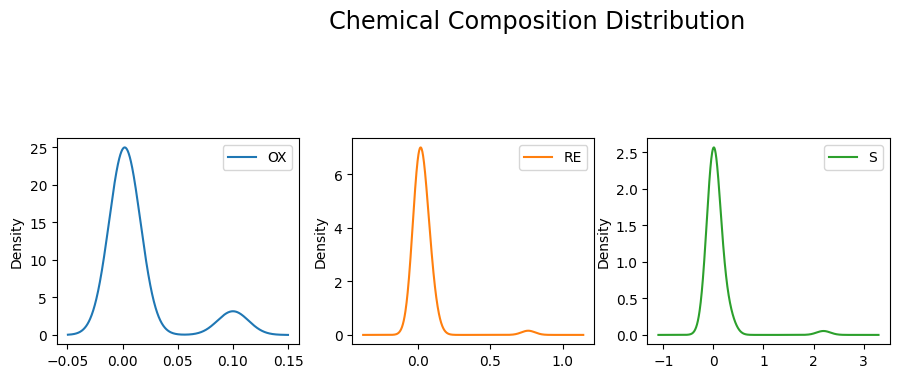

In [5]:
composition = df[['OX', 'RE', 'S']]
composition.plot(kind="density", layout=(6,5),subplots=True,sharex=False, sharey=False, figsize=(15,15));
plt.suptitle("Chemical Composition Distribution",
             x=0.5, y=1.05, ha='right', fontsize='xx-large');
plt.tight_layout()

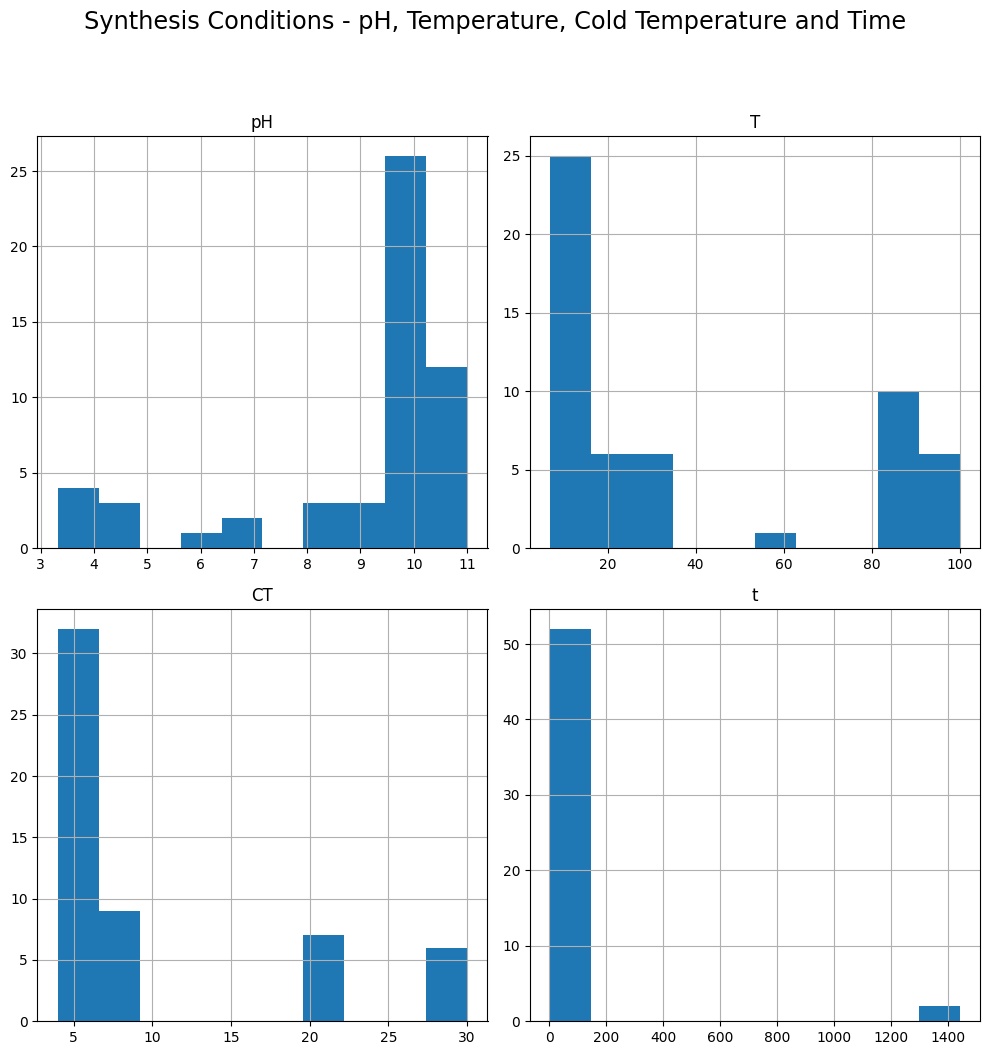

In [6]:
synthesis_parameters = df[['pH', 'T', 'CT', 't']]
synthesis_parameters.hist(figsize=(10, 10));
plt.suptitle("Synthesis Conditions - pH, Temperature, Cold Temperature and Time",
             x=0.5, y=1.05, ha='center', fontsize='xx-large');
plt.tight_layout();

3. MODELING

This project trains three diferent models in order to evaluate which of them works better in the asigned task (Ag NPs size prediction).
- The first model (linear regresion model) will be called "Model 1".
- The second model (4-layer neural network) will be called "Model 2".
- The third model (3-layer neural network) will be called "Model 3".

For training the models we have to select and save all the columns of the dataset that we will be using as features, as well as the target column.

For training the models we have to select and save all the columns of the dataset that we will be using as features, as well as the target column.

In [7]:
x = df[['OX', 'OX_S', 'RE', 'RE_S', 'S', 'SS', 'pH', 'T', 't']].to_numpy()

In [8]:
x.shape

(54, 9)

The vector of target values (AgsNPs sizes) is.-

In [9]:
y = df[['Size']].to_numpy()
y = y.ravel() #To reshape the array in a 1D vector (m,)

In [10]:
y.shape

(54,)

Finally we have to split the vectors in order to create a cross validation set of data.

In [11]:
# We obtain the 80% of the data set as the training set, and the 20% left is used as the cross validation set.
x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size=0.20, random_state=1)

In [12]:
x_train.shape

(43, 9)

In [13]:
x_cv.shape

(11, 9)

MODEL 1 Creation & training.

All the functions for creating and training the models are coded in the "AgNPs_functions" notebook. All we have to do now is to call the functions we need.

In [14]:
#Creation and training of Model 1.-
scaler, model = linear_reg(x_train, y_train)

Evaulating the model

In [15]:
y_cv_pred = prediction(x_cv, model, scaler) #Making predictions over the cross validation set

In [16]:
percentaje_error = val_model(y_cv, y_cv_pred)
print(percentaje_error)
print('Predicted values', y_cv_pred)
print('Target values', y_cv)

100.0
Predicted values [  75.18818288   40.61979328   75.42140944   75.18818288   49.11838702
 -945.38070738  101.62426642   45.95982797  101.35814419   54.81458202
    6.83831562]
Target values [13.66 10.   49.17 15.45 33.14 15.   53.56 19.04 15.25 74.    2.02]


In [17]:
l = len(y_cv)
for i in range(l):
    print('Actual value: ', y_cv[i], '/', 'Predicted value: ', y_cv_pred[i])

Actual value:  13.66 / Predicted value:  75.18818288323936
Actual value:  10.0 / Predicted value:  40.61979327687693
Actual value:  49.17 / Predicted value:  75.42140943727618
Actual value:  15.45 / Predicted value:  75.18818288323936
Actual value:  33.14 / Predicted value:  49.118387016848075
Actual value:  15.0 / Predicted value:  -945.3807073766047
Actual value:  53.56 / Predicted value:  101.62426641733157
Actual value:  19.04 / Predicted value:  45.959827973921904
Actual value:  15.25 / Predicted value:  101.3581441900034
Actual value:  74.0 / Predicted value:  54.81458202140722
Actual value:  2.02 / Predicted value:  6.838315618156152


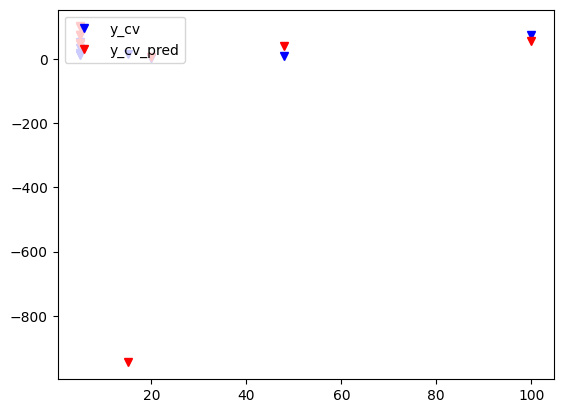

In [18]:
X1 = []
for value in x_cv:
    n = value[3]
    X1.append(n)
y_cv = list(y_cv)
X1 = list(X1)
plt.plot(X1,y_cv,'vb',label="y_cv")
plt.plot(X1,y_cv_pred,'vr',label="y_cv_pred") 
plt.legend(loc="upper left")
plt.show()

REFERENCES

[1] Pryshchepa, O., Pomastowski, P., & Buszewski, B. (2020). Silver nanoparticles: Synthesis, investigation techniques, and properties. Advances in Colloid and Interface Science, 102246. doi:10.1016/j.cis.2020.102246 

[2] Akter, M., Sikder, M. T., Rahman, M. M., Ullah, A. K. M. A., Hossain, K. F. B., Banik, S., Hosokawa, T., Saito, T., & Kurasaki, M. (2018). A systematic review on silver nanoparticles-induced cytotoxicity: Physicochemical properties and perspectives. Journal of Advanced Research, 9, 1–16. https://doi.org/10.1016/j.jare.2017.10.008

[3] Camacho-Jiménez, L., Álvarez-Sánchez, A. R., & Mejía-Ruíz, C. H. (2020). Silver nanoparticles (AgNPs) as antimicrobials in marine shrimp farming: A review. Aquaculture Reports, 18. https://doi.org/10.1016/j.aqrep.2020.100512

[4] Hassanien, A. S., & Khatoon, U. T. (2018). Synthesis and characterization of stable silver nanoparticles, Ag-NPs: Discussion on the applications of Ag-NPs as antimicrobial agents. Physica B: Condensed Matter. doi:10.1016/j.physb.2018.11.004 